# **Welcome to Time Series**

### Introduction

Time series modeling is a set of tools and techniques that model temporal or time series data and aim to predict or forecast future behavior of the data. It has applications in various fields such as finance, economics, weather forecasting, and more.

By analyzing historical data, we can identify different components in time series data such as trends, seasonality, and so on, and use these insights to make more informed business decisions.

In this demonstration, we will explore a few different techniques for time series modeling. As we construct and evaluate our models, we'll gain insight into how different techniques can be used to handle common challenges in time series modeling.



### Problem Statement
In  this demonstration, we will apply time series modeling techniques to a real-world problem that involves a company and its sales. The company has historical sales data that it has captured over a period of time and wishes to forecast future sales trends so that it may optimize its inventory management processes.

The problem statement for this demonstration can be summarized as follows:
> Given historical sales data of a company, forecast its future sales.

By studying the forecast, the company can effectively plan and prepare their inventory to ensure that the right amount of stock is made ready over future months.



### Data Description
You have been provided with a data set containing daily sales and profit data of the company for the period 2011 to 2014. The data set has the following three attributes:

<table>
  <tr>
    <th> Attributes </th>
    <th> Description <th>
  </tr>
  <tr>
    <td> Order-Date </td>
    <td> The date on which the order was placed (in dd-mm-yyyy format) </td>
  </tr>
  <tr>
    <td> Sales </td>
    <td> Total sales value of the transaction (in dollars) </td>
  </tr>
  <tr>
    <td> Profit </td>
    <td> Profit made on the transaction (in dollars) </td>
  </tr>

</table>



### Outline
In this demonstration, we will:
- Prepare the data for time series modeling
- Forecast sales using the following models:
  - Autoregressive (AR)
  - Autoregressive integrated moving average (ARIMA)
  - Seasonal autoregressive integrated moving average (SARIMA)

We will analyze the performance of these models using root mean squared error (RMSE) and mean absolute percentage error (MAPE).

Please note that while we could evaluate the performance of the forecasting models using any one of RMSE or MAPE, to obtain a more comprehensive assessment of their performance, we will use both measures for each model.

## Part 1 - Setup and Data Preparation
In this section, we will:
- Import necessary packages for executing the code
- Load the data
- Prepare the data for further analysis

In [58]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [59]:
# Import the required dataset
df_store = pd.read_csv(r'D:\Intellipaat\Datasets\Superstore_data.csv')
df_store

,Order Date,Sales,Profit
0,11-08-2016,261.9600,41.9136
1,11-08-2016,731.9400,219.5820
2,06-12-2016,14.6200,6.8714
3,10-11-2015,957.5775,-383.0310
4,10-11-2015,22.3680,2.5164
...,...,...,...
5694,12-10-2015,542.9400,141.1644
5695,05-05-2016,71.0880,-1.7772
5696,10-14-2017,27.3960,-42.4638
5697,10-14-2017,13.4560,-23.5480


In [60]:
# Overview of data
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  5699 non-null   object 
 1   Sales       5699 non-null   float64
 2   Profit      5699 non-null   float64
dtypes: float64(2), object(1)
memory usage: 133.7+ KB


In [61]:
# Dtypes of columns in df
df_store.dtypes

Order Date     object
Sales         float64
Profit        float64
dtype: object

As you can see, the data type of the **Order Date** column is **object**. But to further conduct analyses on the data, such as grouping by month or year, we have to convert the data type of the **Order Date** column to **datetime**.

In [62]:
# Convert the object type of order date column to datetime dtype
df_store['Order Date'] = pd.to_datetime(df_store['Order Date'])

In [63]:
df_store.dtypes

Order Date    datetime64[ns]
Sales                float64
Profit               float64
dtype: object

Here as we see the **Order Date** column has been converted to datetime dtype

In [64]:
# Display the year of each record
df_store['Order Date'].dt.year

0       2016
1       2016
2       2016
3       2015
4       2015
        ... 
5694    2015
5695    2016
5696    2017
5697    2017
5698    2016
Name: Order Date, Length: 5699, dtype: int32

In [65]:
# Let's make sure that the data points in the data frame are ordered by date.
df_store.sort_values(by='Order Date', inplace=True)

In [66]:
df_store.head()

,Order Date,Sales,Profit
739,2014-01-04,11.784,4.2717
741,2014-01-04,3.540,-5.4870
740,2014-01-04,272.736,-64.7748
1759,2014-01-05,19.536,4.8840
5327,2014-01-06,19.440,9.3312


In [67]:
# Reset index according to the sorted data
df_store.reset_index(drop=True, inplace=True)

In [68]:
df_store.head()

,Order Date,Sales,Profit
0,2014-01-04,11.784,4.2717
1,2014-01-04,3.540,-5.4870
2,2014-01-04,272.736,-64.7748
3,2014-01-05,19.536,4.8840
4,2014-01-06,19.440,9.3312


Here, **drop = True** used to drop the previous index column, otherwise the function will take it as column.

In [69]:
# set the updated "Order Date" feature as the index of the df
df_store.set_index('Order Date', inplace=True)

In [70]:
df_store.head()

,Sales,Profit
Order Date,,
2014-01-04,11.784,4.2717
2014-01-04,3.540,-5.4870
2014-01-04,272.736,-64.7748
2014-01-05,19.536,4.8840
2014-01-06,19.440,9.3312


Note :-
- When we change the index of the data, then to select the rows using new index we should this method  `df.loc["new_index"]`

In [71]:
# Extract the data using new index 
df_store.loc['2015-04-26']

,Sales,Profit
Order Date,,
2015-04-26,408.422,-5.8346
2015-04-26,97.040,1.2130
2015-04-26,831.936,-114.3912
2015-04-26,72.784,-18.1960


In [72]:
# Extract the sprecific range of data from df
df_store.loc['2016-07-20' : '2016-08-01']

,Sales,Profit
Order Date,,
2016-07-21,18.656,1.3992
2016-07-21,1.941,-1.2940
2016-07-21,99.488,8.7052
2016-07-21,66.688,4.1680
2016-07-21,11.088,-8.1312
2016-07-22,86.200,24.9980
2016-07-22,11.648,3.3488
2016-07-22,109.950,36.2835
2016-07-22,965.850,135.2190


Note :-
- when new index is to be used to select the rows we should always use loc to do the selection of the rows.

- When we have changed the index of the data and still we want to use the old/original index, we should use iloc for the row selection.

In [73]:
# Extract the data using the original index
df_store.iloc[2:10]

,Sales,Profit
Order Date,,
2014-01-04,272.736,-64.7748
2014-01-05,19.536,4.8840
2014-01-06,19.440,9.3312
2014-01-09,31.200,9.7500
2014-01-09,9.344,1.1680
2014-01-10,51.940,21.2954
2014-01-10,2.890,1.3583
2014-01-11,9.940,3.0814


To study monthly sales, we need to group the rows of *df* by month and sum up the values in each group.

We will use the *Grouper* function in conjunction with the *groupby* operation for grouping. 

**Grouper** is a function in the pandas library that allow us to group time series data based on a specific frequency (**freq**) which in our case is monthly (**M**).

In [74]:
# Group the data by month and sum up the values in each group
df_store = df_store.groupby(pd.Grouper(freq = 'M')).sum()

In [75]:
df_store.head()

,Sales,Profit
Order Date,,
2014-01-31,8363.945,983.7126
2014-02-28,2942.484,616.9108
2014-03-31,34777.982,-1603.1152
2014-04-30,17668.761,1458.6355
2014-05-31,11722.297,1550.7469


Here, we can see that only one date from each month is used in the index as representative of each of those months.

Recall from the problem statement that we are interested in forecasting **"Sales"**. So, we can drop the **"Profit"** feature from our data set.

In [76]:
# drop the profit column because we need to focus on Sales
df_store.drop(columns = 'Profit', inplace = True) 

In [77]:
df_store.head()

,Sales
Order Date,
2014-01-31,8363.945
2014-02-28,2942.484
2014-03-31,34777.982
2014-04-30,17668.761
2014-05-31,11722.297


<Axes: xlabel='Order Date'>

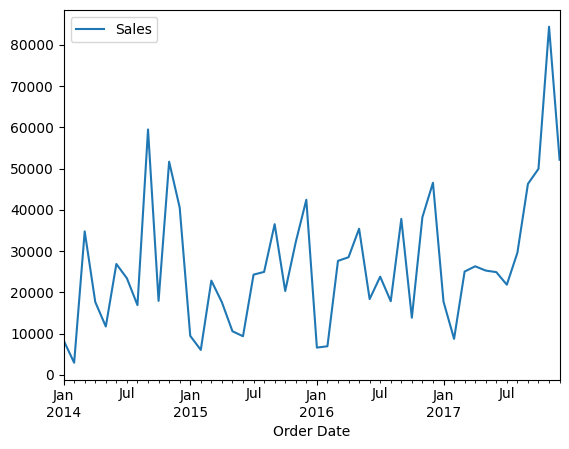

In [78]:
# Plot the time series data
df_store.plot()   # Plot function is used to make a lineplot always

## Part 2 - Stationarity Analysis
In this part of the demonstration, we will perform tests on the time series data to understand whether it is stationary or not. The autoregressive modeling requires the time series data to be stationary. To test this, we will use the following test:
- Augmented Dickey–Fuller (ADF) test

### ADF Test

In [79]:
from statsmodels.tsa.stattools import adfuller

Note :- 
- The null hypothesis for ADF test is **The time series is not stationary**.
- The alternate hypothesis is **The time series is stationary**

In [80]:
result = adfuller(df_store['Sales'])
result[1]

7.391771609612346e-05

- If the $p$-value is < $0.05$, then our data is stationary otherwise our data is non-stationary

- We have analyzed our time series data. Let's now split the data into training and testing sets so that we're ready to build and evaluate time series models on the data.

Note :- 
- Here, the data is already stationary so no need to do the transformation in real case.<br/> 
  But we will do it now for understanding purpose that how data will be transformed.

In [81]:
# Shape of data
df_store.shape

(48, 1)

In [82]:
# Splitting the data into training and testing sets
df_train = df_store[0:42]         # first 42 months data to be used for training purpose
df_test = df_store[42:]           # last six months data to be used for testing purpose

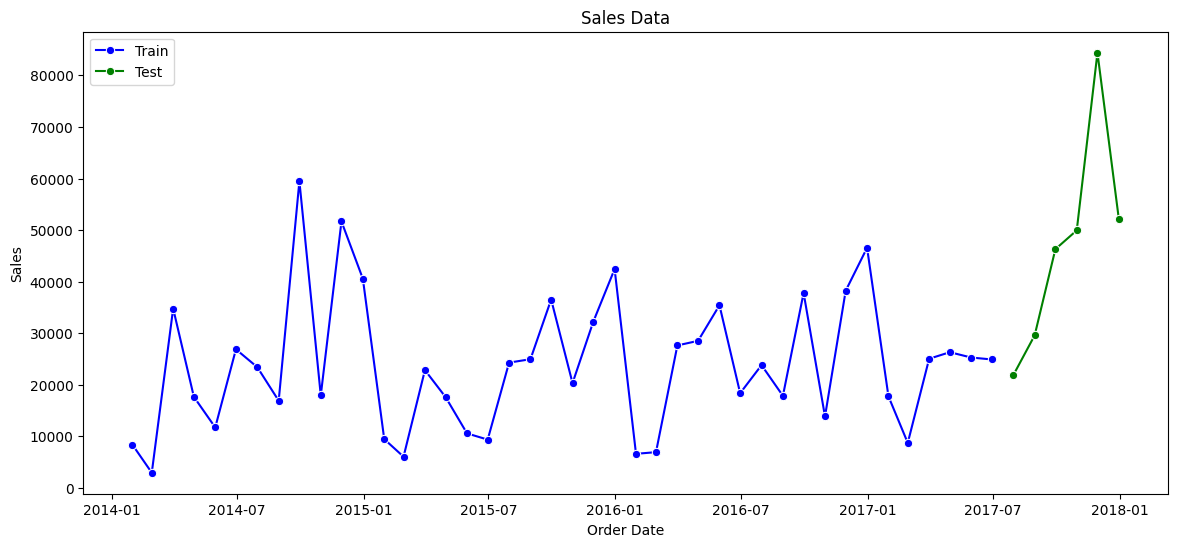

In [83]:
# Plot the time series data with the train-test split
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_test, x = 'Order Date', y = 'Sales', marker = 'o', color = 'green', label = 'Test')
plt.title('Sales Data');

## Part 3 - Time Series Transformations
Now we will transform the time series data so that it ends up having a more stationary mean and variance. To do this, we will use the following data transformations:
- Box-Cox transformation
- Differencing

Box-Cox transformation is used to make the variance of a time series stationary and differencing is used to make its mean stationary. Note that although these methods can be executed in any order, differencing is done after Box-Cox transformation in general.

### Subpart 1 - Box-Cox Transformation

The Box-Cox transformation is used to stabilize the variance of a time series. It involves the application of a power transformation to the time series data. Let's import the *boxcox* method from *scipy* to implement this transformation.

In [84]:
# Import the boxcox from scipy.stats
from scipy.stats import boxcox

Note that from here on out, we will only perform data transformations on the training data to avoid data leakage.

In [85]:
# This data will have constant variance
df_boxcox = pd.Series(boxcox(df_train['Sales'], lmbda = 0), index = df_train.index)

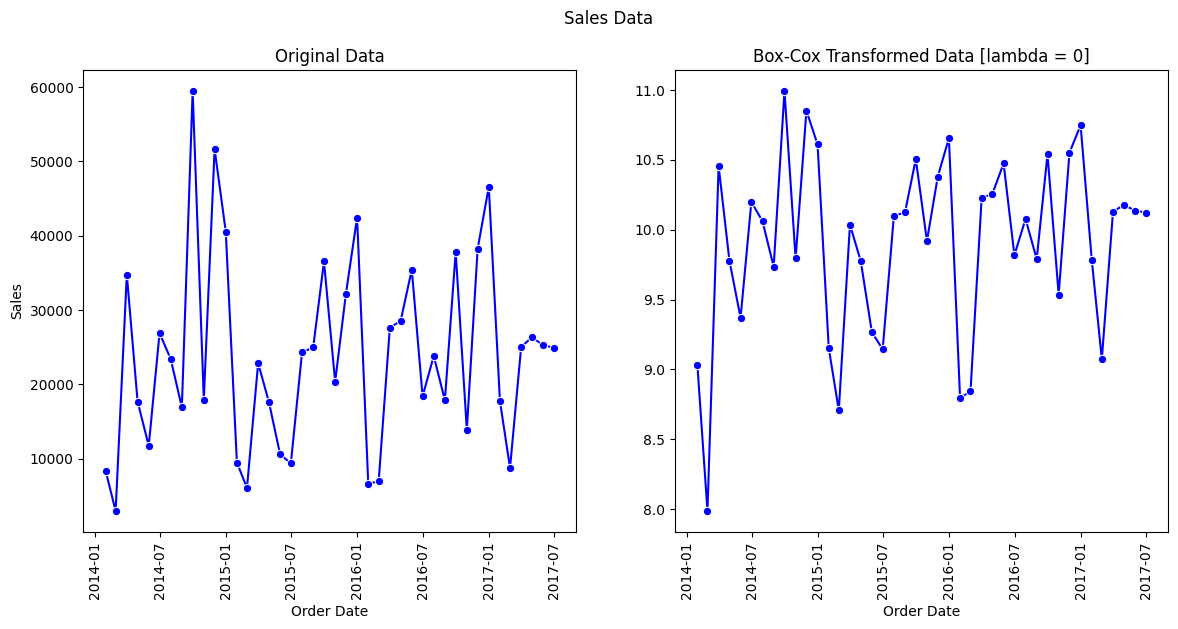

In [86]:
# Plot the original time series data and its Box-Cox transformed version
plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Original Data')

plt.subplot(1, 2, 2)
sns.lineplot(x = df_boxcox.index, y = df_boxcox.values, marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Box-Cox Transformed Data [lambda = 0]')

plt.suptitle('Sales Data');

### Subpart 2 - Differencing

Differencing is used to stabilize the mean of a time series. It involves taking the difference of consecutive data points in the time series. If this process is executed once, it is known as first-order differencing. If done twice, it is called second-order differencing. And so on.

In [87]:
df_differenced = df_train['Sales'].diff()

Note that differencing results in a missing value at the beginning of the series, but this is not of much consequence for the analysis.

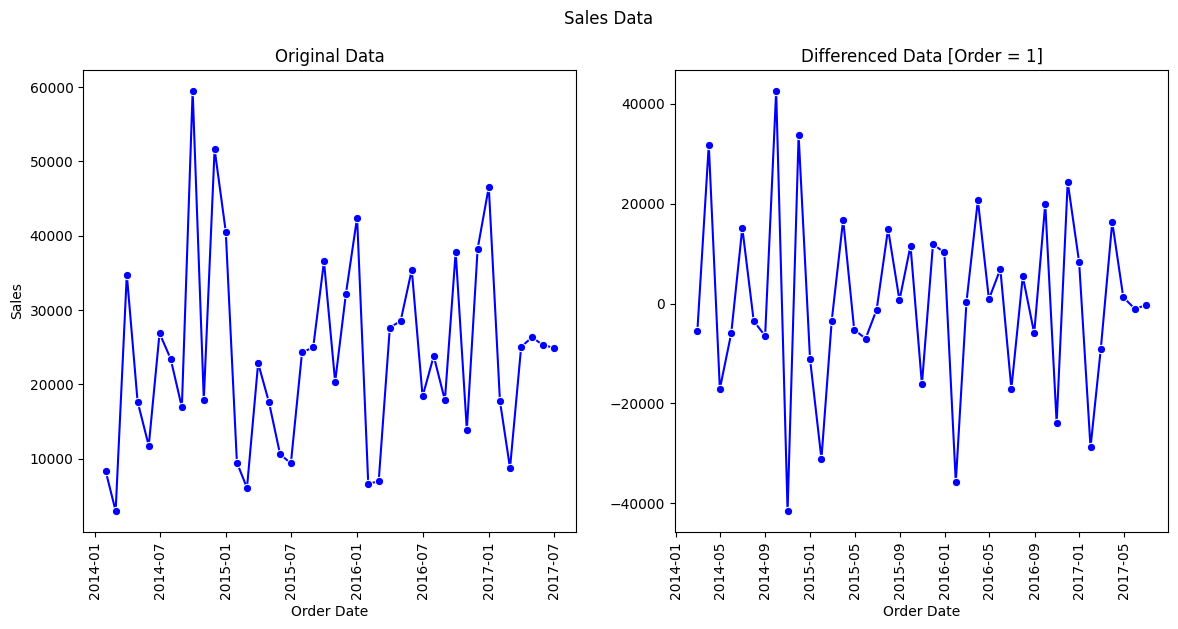

In [88]:
# Plot the original time series data and its first-order differenced version
plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Original Data')

plt.subplot(1, 2, 2)
sns.lineplot(x = df_differenced.index, y = df_differenced.values, marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Differenced Data [Order = 1]')

plt.suptitle('Sales Data');

We will continue with difference order $=1$ for the remainder of the demonstration. However, you are free to analyze the impact of other order values on the mean of the time series data.

### Subpart 3 - Transformed Time Series Data

We will now apply the Box-Cox and the differencing transformations on the training data so that the data is ready for autoregressive time series modeling.

In [89]:
df_boxcox = pd.Series(boxcox(df_train['Sales'], lmbda = 0), index = df_train.index)  #this data will have constant variance
df_boxcox_diff = df_boxcox.diff()

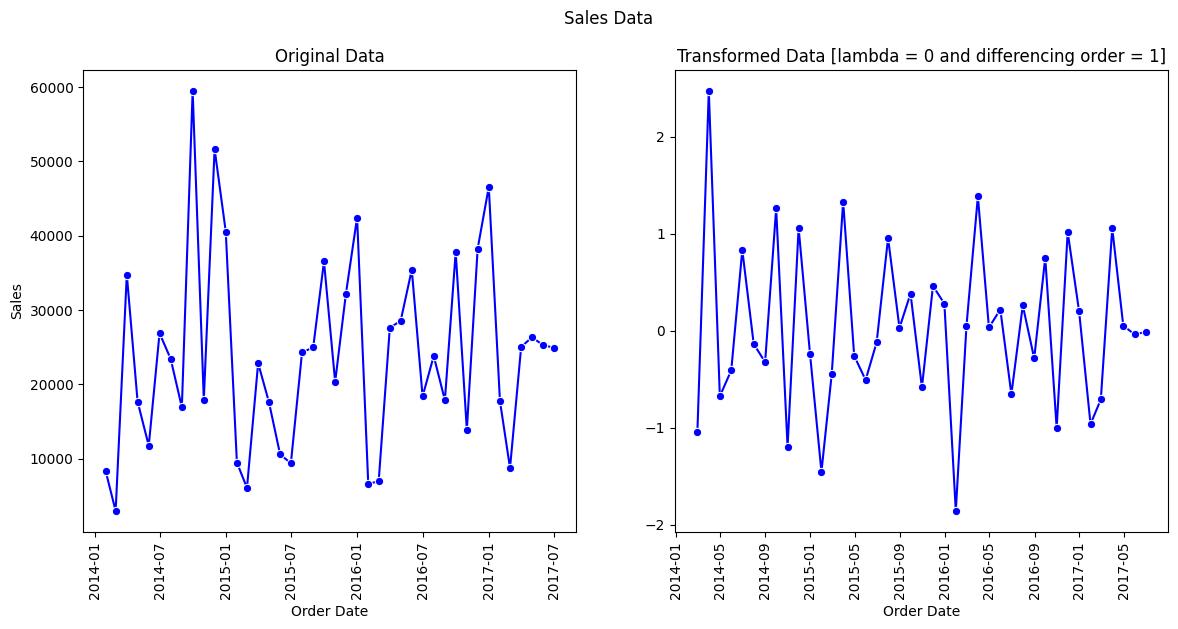

In [90]:
# Plot the original time series data and its transformed version
plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Original Data')

plt.subplot(1, 2, 2)
sns.lineplot(x = df_boxcox_diff.index, y = df_boxcox_diff.values, marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Transformed Data [lambda = 0 and differencing order = 1]')

plt.suptitle('Sales Data');

## Part 4 - Autocorrelation Plots
In this part of the demonstration, we will compute and visualize the autocorrelation function (ACF) and the partial autocorrelation function (PACF) plots for the time series data.

### Subpart 1 - Autocorrelation Function (ACF) Plot

The autocorrelation function (ACF) plot shows the autocorrelation values of a time series for different lag orders. Let's import the *plot_acf* method from *statsmodels* to implement this.

In [91]:
# Import 'plot_acf' from 'statsmodels' to compute and visualize the autocorrelation function (ACF) for the time series
from statsmodels.graphics.tsaplots import plot_acf

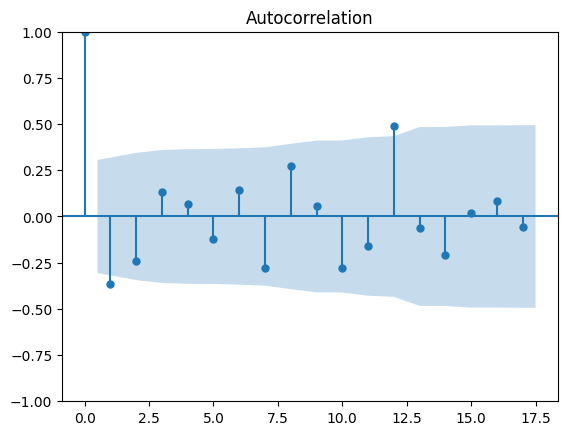

In [92]:
# Note: Since differencing results in a missing value at the beginning, we must exclude it
plot_acf(x = df_boxcox_diff[1:]);

We can see a strong autocorrelation value at lag order $=1$ & lag order $=12$.

Lagged values in time series are used to analyze the relationship between events that occur at different points in time

In simple words, ACF measures the correlation between a time series with its lagged values.<br/>
If you have daily stock prices, the autocorrelation at lag 12 would measure how today's stock price relates to stock prices on 12 days ago.

### Subpart 2 - Partial Autocorrelation Function (PACF) Plot

The partial autocorrelation fucntion (PACF) plot shows the partial autocorrelation values of a time series for different lag orders.<br/> 
Partial autocorrelation is computed such that it ignores short-term correlations in the data.<br/>
 Let's import the *plot_pacf* method from *statsmodels* to implement this.

In [93]:
# Import 'plot_pacf' from 'statsmodels' to compute and visualize the partial autocorrelation function (ACF) for the time series
from statsmodels.graphics.tsaplots import plot_pacf

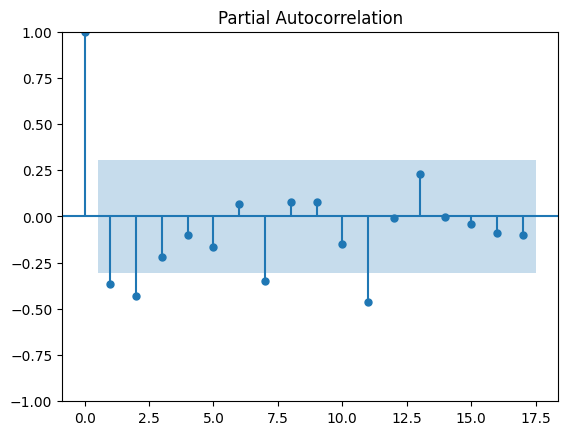

In [94]:
# Note: Since differencing results in a missing value at the beginning, we must exclude it
plot_pacf(x = df_boxcox_diff[1:]);

We can see a strong partial autocorrelation value at multiple lag values, but lag order = 11 is the strongest

Note :- 
- The multiple values we get, maybe its because data is already stationary and we still doing transformation. In real case you will get the limited lag values.

# Part 5 - Autoregressive Models
In this part of the demonstration, we will fit autoregressive models to the data and anaylze their performance using RMSE and MAPE values. We will build the following models:
- Autoregressive (AR)
- Autoregressive integrated moving average (ARIMA)
- Seasonal autoregressive integrated moving average (SARIMA)

### Subpart 1 - Autoregressive (AR) Method

We will begin by fitting a basic autoregressive model to the training data and analyze its performance.<br/> 
We will use the **ARIMA** method from **statsmodels** to build the model.

Note :- The **ARIMA** method can also be used to implement other autoregressive (AR) models.

**order = (p, d, q)**

In AR method :- 
- you will pass **p**, the value you get from *Partial Auto Correlation function (pacf)*
- **d** & **q** will always be zero (0) in *AR model*

Let's import the **ARIMA** method from *statsmodels*.

In [95]:
# Import 'ARIMA' from 'statsmodels' for building autoregressive models
from statsmodels.tsa.arima.model import ARIMA

In [96]:
# Fit an AR model to the transformed training data with lag order 1 and view its optimal parameter values
# Note: You may try other suitable lag order values as well
ar_model = ARIMA(df_boxcox_diff, order = (11, 0, 0))
ar_model = ar_model.fit()

In [97]:
# Obtain predictions from the AR model for the testing data indices
train_len = 42
ar_model_preds = ar_model.predict(start = train_len, end = len(df_store)-1)

Here, 
- From 0 to 41 is our training data 
- From 42 to 48 (end) is our testing data

In [98]:
# Append the predictions with 'df_boxcox_diff' to prepare the data for inverse transformation
df_boxcox_diff_preds = pd.concat([df_boxcox_diff, ar_model_preds])

In [99]:
# Reverse the differencing transformation that was done on the data
df_boxcox_preds = df_boxcox_diff_preds.cumsum()         # cummulative sum
df_boxcox_preds = df_boxcox_preds.add(df_boxcox[0])     # Initial value adjustment

In [100]:
# Reverse the Box-Cox transformation that was done on the data
df_preds = np.exp(df_boxcox_preds)      # Exponential

Let's visualize the predictions along with the data before computing error measures.

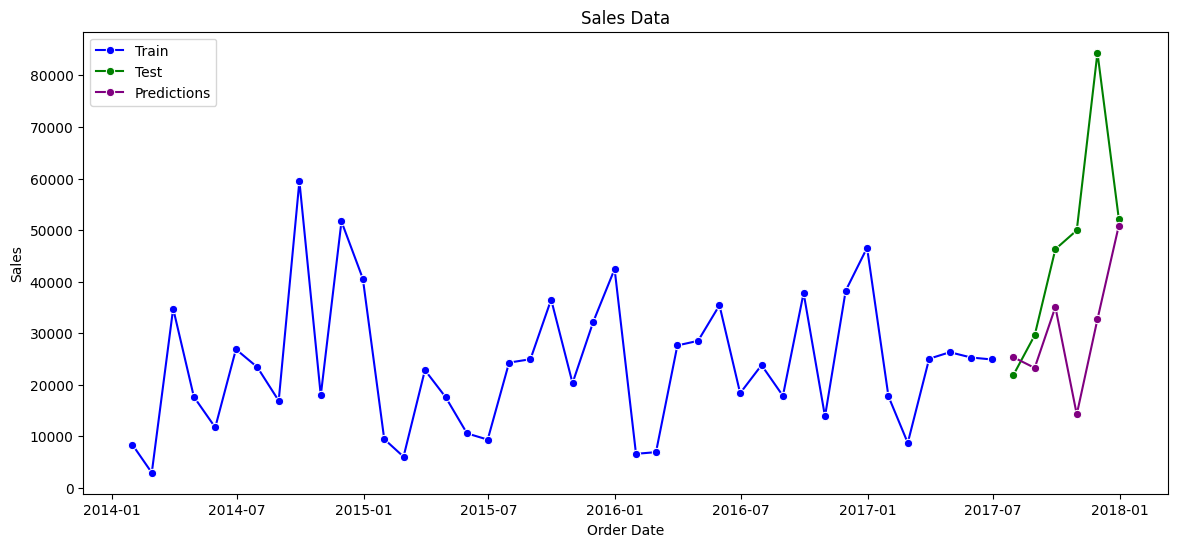

In [101]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_test, x = 'Order Date', y = 'Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = df_preds.index[train_len:], y = df_preds.values[train_len:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Sales Data');

Next, let's compute performance metrics for the model. But to do that, we will first import the *mean_squared_error* function from *sklearn*.

In [102]:
# Import 'mean_squared_error' from 'sklearn' for error computations
from sklearn.metrics import root_mean_squared_error

In [103]:
# Summarize the performance of the model on the test data using RMSE and MAPE
rmse = root_mean_squared_error(y_true = df_test['Sales'], y_pred = df_preds.values[train_len:])

rmse = np.round(rmse, 2)

performance_df = pd.DataFrame(index = [0],data = {'Model': 'AR', 'RMSE': rmse})

performance_df.set_index('Model', inplace = True)

performance_df

,RMSE
Model,
AR,26223.3


### Subpart 2 - Autoregressive Integrated Moving Average (ARIMA) Method

We will now a fit an autoregressive integrated moving average model to the training data and analyze its performance. We will use the *ARIMA* method from *statsmodels* to build the model.

Note :- The *ARIMA* method can also be used to implement other autoregressive models.

The parameter of interest in the *ARIMA* method is the *order* parameter. It is a 3-tuple of the form $(p, d, q)$ with the default value as $(0, 0, 0)$.

**order = (p, d, q)**

In ARIMA method :- 
- you have to pass **p**, the value / lag order you get from *Partial Auto Correlation function (pacf)*
- you have to pass **q**, the value / lag order you get from *Auto Correlation function (acf)*
- **d** is differencing value, means the no. of times differencing has been done, here is 1. And in 95% of cases d value will be 0 or 1.

For the ARIMA method, we will specify all the values in this tuple. The first and the third values are the $p$ and $q$ values or the lag orders obtained from the PACF and the ACF plots respectively. The second value in the tuple is $d$ or the differencing order which we shall set as $1$.

Note :- In ARIMA model, the differencing in already integrated, so we will use df_boxcox instead of df_boxcox_diff.

In [104]:
# Fit an ARIMA model to the transformed training data with 'p = 11', 'd = 1' and 'q = 1' and view its optimal parameter values
# Note: Since differencing is integrated into the ARIMA method, we will use 'df_boxcox' instead of 'df_boxcox_diff'
arima_model = ARIMA(df_boxcox, order = (11, 1, 12))
arima_model = arima_model.fit()

In [105]:
# Obtain predictions from the ARIMA model for the testing data indices
train_len = 42
arima_model_preds = arima_model.predict(start = train_len, end = len(df_store)-1)

In [106]:
# Append the predictions with 'df_boxcox' to prepare the data for inverse transformation
df_boxcox_preds = pd.concat([df_boxcox, arima_model_preds])

In [107]:
# Reverse the Box-Cox transformation that was done on the data
df_preds = np.exp(df_boxcox_preds)

Let's visualize the predictions along with the data before computing error measures.

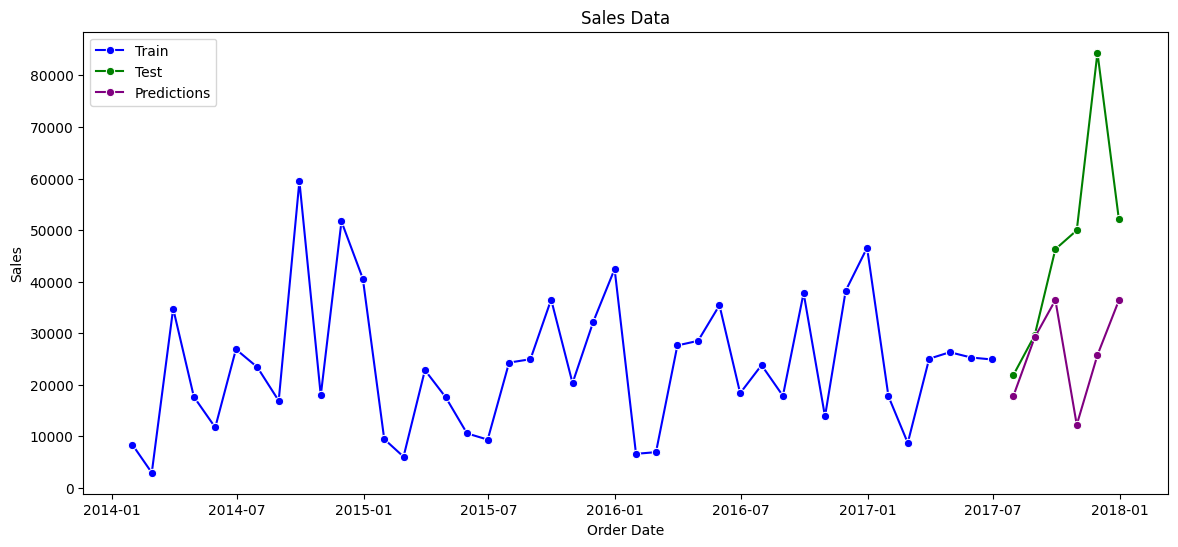

In [108]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_test, x = 'Order Date', y = 'Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = df_preds.index[train_len:], y = df_preds.values[train_len:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Sales Data');

Next, let's compute performance metrics for the model.

In [109]:
# Summarize the performance of the model on the test data using RMSE and MAPE
rmse = root_mean_squared_error(y_true = df_test['Sales'], y_pred = df_preds.values[train_len:])

rmse = np.round(rmse, 2)

performance_df_temp = pd.DataFrame(index = [0], data = {'Model': 'ARIMA', 'RMSE': rmse})

performance_df_temp.set_index('Model', inplace = True)

performance_df = pd.concat([performance_df, performance_df_temp])

performance_df

,RMSE
Model,
AR,26223.30
ARIMA,29507.33


### Subpart 3 - Seasonal Autoregressive Integrated Moving Average (SARIMA) Method

We will now a fit a seasonal autoregressive integrated moving average model to the training data and analyze its performance. We will use the *SARIMAX* method from *statsmodels* to build the model.

Let's import the *SARIMAX* method from *statsmodels*.

The parameter of interest in the *ARIMA* method is the *order* parameter. It is a 3-tuple of the form $(p, d, q)$ with the default value as $(0, 0, 0)$.

**order = (p, d, q)**

In Order :- 
- you have to pass **p**, the value / lag order you get from *Partial Auto Correlation function (pacf)*
- you have to pass **q**, the value / lag order you get from *Auto Correlation function (acf)*
- **d** is differencing value, means the no. of times differencing has been done, here is 1. And in 95% of cases d value will be 0 or 1.

**Seasonal_order = (p, d, q, m)**

In Seasonal Order :-
- The **p, d, q** remains same as order
- The **m** is the season format of the data, means 
    * week wise data, then season = 54, since there are 54 weeks in year
    * quarter wise data, then season = 4, since there are 4 quarters in year
    * month wise data, then season = 12, since there are 12 months in year 
    * half yearly data, then season = 2, which is obvious

In this example, data is in monthly format, so season = 12

In [110]:
# Import 'SARIMAX' from 'statsmodels' for building autoregressive models
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# Note: We know that the seasonality period in the data is 'm = 12'
# Note: Since differencing is integrated into the SARIMA method, we will use 'df_boxcox' instead of 'df_boxcox_diff'
sarima_model = SARIMAX(df_boxcox, order=(11, 1, 12), seasonal_order=(11, 1, 12, 12))
sarima_model = sarima_model.fit()

END

---